# pandas 
[pan]al  [da]ta

### for what?

- 전처리
    - row는 관측치, col은 변수의 2차원 데이터로 구성(db와 유사)

- EDA

### *pandas*의 장점

 1. numpy기반으로 만들어짐. 빠름
 2. 데이터 분석 도구도 포함
 2. R기능 대부분 제공해 편함
 2. NA처리가 쉽다
 3. 차원에 대한 장점



In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'0.23.3'

### DataFrame

read시 우선 확인

1) .head()

2) .info()

3) .describe()

4)  .sample()


In [16]:
df = pd.read_csv('data/data-netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [4]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info() # object DataType은 주로 string
# memory usage -> 데이터를 메모리에 올려서 사용, 속도빠르지만 크기에 한계(dask 존재)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [8]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [10]:
df.sample(3)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
788,The Pirate Fairy,G,General Audiences. Suitable for all ages.,35,2014,57.0,80
698,Goldie & Bear,TV-Y,Suitable for all ages.,10,2016,77.0,80
717,Secret of the Wings,G,General Audiences. Suitable for all ages.,35,2012,65.0,80


In [22]:
iris= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None) # url에서 바로 읽어온다
# header에 index 넣으면 거기까지 header로 간주하고 날려버림

In [30]:
# iris.head()
# iris.info()
# iris.describe()
# iris.sample()

In [34]:
df2 =  pd.read_csv('data-netflix.csv', index_col='title') # col을 idx로 지정가능
df2.head(3)

,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
title,,,,,,
White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


In [37]:
df3 =  pd.read_csv('data/data-netflix.csv', usecols=['title','rating','release year']) # cols 지정해 가져오기 가능
df3.head(3)

,title,rating,release year
0,White Chicks,PG-13,2004
1,Lucky Number Slevin,R,2006
2,Grey's Anatomy,TV-14,2016


In [43]:
pd.read_csv('data/data-netflix.csv', skiprows=(1,3,4)).head(5)  #skiprows 

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
1,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
2,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
3,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
4,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80


In [48]:
pd.read_csv('data/data-netflix.csv', skipfooter=2, engine='python').info() #skip rows from footer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
title                998 non-null object
rating               998 non-null object
ratingLevel          940 non-null object
ratingDescription    998 non-null int64
release year         998 non-null int64
user rating score    604 non-null float64
user rating size     998 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.7+ KB


In [49]:
import seaborn as sns
tip = sns.load_dataset('tips', engine = 'python') #engine 옵션을 명확히 주어서 c계열 등과 혼용에 따른 에러를 피한다 
tip.head()

In [53]:
pd.read_csv('data/data-netflix.csv', nrows=100).shape # reading only a subset of data

(100, 7)

#### read계열
대부분의 format을 지원하여 강력한 기능

In [56]:
#pd.read_excel('data-netflix.xlsx', sheet_name=0).head(3)
pd.read_json('data/data-netflix.json').head(3)
pd.read_pickle('data/data-netflix.p').head(3)

# pd.read_html() -> 비추, bs나 lxml등 이용하자

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


In [57]:
import sqlite3
conn = sqlite3.connect('data/data-netflix.sqlite')
df_sql = pd.read_sql_query("SELECT * FROM data_netflix;", conn) # db와 연동해 직접 쿼리한 결과를 받아올수있다
df_sql.head(3)

,ogc_fid,title,rating,ratinglevel,ratingdescription,release year,user rating score,user rating size
0,1,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82,80
1,2,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NA,82
2,3,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98,80


In [74]:
df =  pd.read_csv('data/data-netflix.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82,80
2,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
3,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98,80
4,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98,80


In [3]:
df.to_html('data/data-netflix.html') #html로 바로 넘기기도 가능

### 인덱싱/슬라이싱

__['col']__: dict 방식, series 리턴

__[['col']]__: dict 방식, df 리턴 (추천)

__.col__ : attribute 방식

#### *index 방식*

__loc__ gets rows (or columns) with particular ***labels*** from the index.  그래서 col은 이름으로 인덱싱

__iloc__ gets rows (or columns) at particular ***positions*** in the index (so it only takes integers). 그래서 col을 integer로 인덱싱

__ix__ usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index.

__at__ the fastest

__iat__ index based 'at'

In [5]:
df = df.head(5)

In [6]:
df['title'] # col을 가져옴, series

0             White Chicks
1      Lucky Number Slevin
2           Grey's Anatomy
3             Prison Break
4    How I Met Your Mother
Name: title, dtype: object

In [7]:
df[['title']] # col을 df로 가져옴

,title
0,White Chicks
1,Lucky Number Slevin
2,Grey's Anatomy
3,Prison Break
4,How I Met Your Mother


In [10]:
df[['rating', 'title']] # 당연히 여러 col 가져올수 있음

,rating,title
0,PG-13,White Chicks
1,R,Lucky Number Slevin
2,TV-14,Grey's Anatomy
3,TV-14,Prison Break
4,TV-PG,How I Met Your Mother


In [8]:
df.title

0             White Chicks
1      Lucky Number Slevin
2           Grey's Anatomy
3             Prison Break
4    How I Met Your Mother
Name: title, dtype: object

In [11]:
df.loc[[0,3]]  # pandas 에서는 기본적으로 리스트를 인자로 넣으면 여러개 인덱싱

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80


In [13]:
df.loc[1:3] # 슬라이싱

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80


In [17]:
df.columns

Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')

In [14]:
df.loc[1:3,['title','rating']]

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [68]:
df.loc[1:3,'title':'rating'] # 이게 된다, col에 Index가 들어갔기 때문

,title,rating
1,Lucky Number Slevin,r
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [15]:
df.iloc[1:3,0:2] # 리스트 슬라이싱과 같이 끝에꺼 빼준다 -> loc과 헷갈리지 말기

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14


In [77]:
df.iloc[[1,2,3],[0,1,]] # 인자에 리스트 넣는게 기본

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [20]:
df.at[1,'rating'] # 딱하나 인덱싱하는 at

'R'

In [22]:
%timeit df.loc[1,'rating']

14.8 µs ± 729 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
%timeit df.at[1,'rating'] # 속도훨씬 빠르다

9.39 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
df.loc[1,'rating'] = 'r' # 바로 바뀐다
df.loc[1,'rating']

'r'

In [35]:
df.iat[1,1] # i 붙으면 integer base

'r'

In [36]:
%timeit df.at[1,'title'] # 원래 dic기반이라 더 빠르다

9.42 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%timeit df.iat[1,1]

10.3 µs ± 369 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
zlw = pd.read_csv('data/data-zillow.csv')

In [40]:
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


In [43]:
zlw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 8 columns):
Date          10830 non-null object
RegionID      10830 non-null int64
RegionName    10830 non-null object
State         10830 non-null object
Metro         10256 non-null object
County        10830 non-null object
SizeRank      10830 non-null int64
Zhvi          10830 non-null int64
dtypes: int64(3), object(5)
memory usage: 677.0+ KB


In [41]:
zlw.describe()

,RegionID,SizeRank,Zhvi
count,10830.000000,10830.000000,1.083000e+04
mean,84344.818837,5414.500000,2.503076e+05
std,125679.686534,3126.496042,2.565582e+05
min,3301.000000,0.000000,3.740000e+04
25%,19346.250000,2707.250000,1.269000e+05
50%,35444.500000,5414.500000,1.818000e+05
75%,52608.250000,8121.750000,2.823500e+05
max,737791.000000,10829.000000,6.343800e+06


In [59]:
zlw.describe()

,RegionID,SizeRank,Zhvi
count,10830.000000,10830.000000,1.083000e+04
mean,84344.818837,5414.500000,2.503076e+05
std,125679.686534,3126.496042,2.565582e+05
min,3301.000000,0.000000,3.740000e+04
25%,19346.250000,2707.250000,1.269000e+05
50%,35444.500000,5414.500000,1.818000e+05
75%,52608.250000,8121.750000,2.823500e+05
max,737791.000000,10829.000000,6.343800e+06


In [51]:
zlw.skew()

RegionID    1.973159
SizeRank    0.000000
Zhvi        6.714811
dtype: float64

In [52]:
zlw.kurtosis()

RegionID     2.291461
SizeRank    -1.200000
Zhvi        82.042387
dtype: float64

In [61]:
zlw.corr()

,RegionID,SizeRank,Zhvi
RegionID,1.000000,0.052025,-0.032184
SizeRank,0.052025,1.000000,-0.115621
Zhvi,-0.032184,-0.115621,1.000000


In [64]:
zlw.at[1,'Metro'] = zlw.at[1,'Metro'].replace('-',' ') 

In [65]:
zlw.at[1,'Metro']

'Los Angeles Long Beach Anaheim'

In [69]:
zlw['새로운 변수'] = 1 # broadcasting

In [70]:
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi,새로운 변수
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400,1
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900,1
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700,1
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300,1
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300,1


In [71]:
del zlw['새로운 변수']
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


### 데이터 필터링
#### selecting rows

In [81]:
zlw.loc[zlw.Date=='2017-05-31'].head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


In [111]:
zlw.loc[zlw['Zhvi']>1000000].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
53,2493,2017-05-31,30145,Alamo,CA,San Francisco,Contra Costa,2493,1652000
148,10203,2017-05-31,30203,Amagansett,NY,New York,Suffolk,10203,2613800
237,639,2017-05-31,50749,Arcadia,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,639,1110800
319,4629,2017-05-31,30280,Atherton,CA,San Francisco,San Mateo,4629,6343800
378,9417,2017-05-31,43996,Avalon,NJ,Ocean City,Cape May,9417,1167500


#### selecting rows with projection

In [84]:
zlw.loc[zlw.State=='CA','State':'Metro'].head()

,State,Metro
1,CA,Los Angeles Long Beach Anaheim
6,CA,San Diego
8,CA,San Jose
10,CA,San Francisco
29,CA,Fresno


#### sorting

In [96]:
zlw.sort_values(by = ['RegionName','RegionID'], ascending=[True,False], inplace=False,axis=0).head()  # inplace =False 시 임시객체만들어 리턴(default)

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200
2073,2017-05-31,30116,Aberdeen,WA,Aberdeen,Grays Harbor,2073,127800


In [97]:
zlw.sort_values('RegionName', inplace=True) #inplace=True 면 데이터가 변함
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
2081,2017-05-31,16675,Aberdeen,MD,Baltimore,Harford,2081,206500
4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200


In [98]:
zlw.reset_index(inplace=True, drop=False) # Index가 맘에 안드니 index를 reset, drop=False(default)면 기존 인덱스까지 보존

In [99]:
zlw.head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
1,9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
2,10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
3,2081,2017-05-31,16675,Aberdeen,MD,Baltimore,Harford,2081,206500
4,4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200


#### filter : projection

In [103]:
zlw.filter(items=['State','Metro']).head() # items는 col이름,  like는 포함불포함 ,regex

,State,Metro
0,GA,NaN
1,MS,Oxford
2,PA,Gettysburg
3,MD,Baltimore
4,MS,NaN


In [117]:
zlw.filter(like=('Met')).head()

,Metro
0,NaN
1,Oxford
2,Gettysburg
3,Baltimore
4,NaN


In [108]:
zlw.filter(regex='^Region').head()

,RegionID,RegionName
0,50632,Abbeville
1,30113,Abbeville
2,43810,Abbottstown
3,16675,Aberdeen
4,43813,Aberdeen


#### filter with isin: projection with selection

In [121]:
filter1 = zlw['State'].isin(['DC','PA'])
zlw[filter1].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
2,10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
12,2727,2017-05-31,35245,Abington,PA,Philadelphia,Montgomery,2727,265800
13,8008,2017-05-31,397472,Abington Township,PA,Scranton,Lackawanna,8008,305100
46,7521,2017-05-31,30142,Akron,PA,Lancaster,Lancaster,7521,181300
63,8862,2017-05-31,398935,Albany Township,PA,Reading,Berks,8862,214000


In [175]:
type(filter1) # series인 true false를 반환

pandas.core.series.Series

In [177]:
filter2 = zlw.isin({'State':['CA'], 'Metro':['San Francisco']}) # dic으로 한번에 selecting, projecting 가능
print(type(filter2))# 그러면 df인 true false 를 반환
filter2.sample(5) 

<class 'pandas.core.frame.DataFrame'>


,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
1340,False,False,False,False,True,False,False,False,False
4695,False,False,False,False,False,False,False,False,False
6346,False,False,False,False,True,False,False,False,False
1968,False,False,False,False,False,False,False,False,False
2620,False,False,False,False,False,False,False,False,False


In [190]:
zlw[filter2].sample(5)

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
2932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### multiple condition

In [119]:
zlw[(zlw.Zhvi > 1000000) & (zlw.State == 'NY')].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
148,10203,2017-05-31,30203,Amagansett,NY,New York,Suffolk,10203,2613800
986,10457,2017-05-31,36840,Bridgehampton,NY,New York,Suffolk,10457,1703600
1794,8317,2017-05-31,35276,Cold Spring Harbor,NY,New York,Suffolk,8317,1164600
2543,6736,2017-05-31,17874,East Hills,NY,New York,Nassau,6736,1299300
3108,7728,2017-05-31,194752,Flower Hill,NY,New York,Nassau,7728,1220300


#### 예제: 강남구 아파트 정보 찾기

In [123]:
apt = pd.read_csv('data/apt_final.csv')

In [124]:
apt.head() # 구 라는 컬럼이 없어서 만들어야함

,price_per_area,price,con_year,year,dong,aptnm,month,dat,area,area_sub,...,seoul_cons_ratio,bond_one_year,bond_three_year,bond_five_year,bond_ten_year,corp_bond_yield_rate,call_rate,interest,interest_on_loan,cd
0,1979,71000.0,1982,2009,개포동,개포주공 3단지,10,1~10,35.87,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
1,1994,83700.0,1982,2009,개포동,개포주공 1단지,10,1~10,41.98,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
2,1128,173500.0,2004,2009,개포동,개포자이(12-2),10,1~10,153.80,large,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
3,1204,65000.0,1983,2009,개포동,개포주공 5단지,10,1~10,53.98,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
4,1214,160000.0,1986,2009,개포동,현대2,10,1~10,131.83,large,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79


In [126]:
apt.dong.unique() #강남구에 해당하는 동을 리스트로 묶어줘야 한다

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '수서동', '신사동', '압구정동', '역삼동',
       '일원동', '청담동', '강일동', '고덕동', '길동', '둔촌동', '명일동', '상일동', '성내동',
       '암사동', '천호동', '미아동', '번동', '수유동', '우이동', '가양동', '공항동', '내발산동',
       '등촌동', '마곡동', '방화동', '염창동', '화곡동', '남현동', '봉천동', '신림동', '가리봉동',
       '개봉동', '고척동', '구로동', '궁동', '신도림동', '오류동', '온수동', '항동', '가산동',
       '독산동', '시흥동', '공릉동', '상계동', '월계동', '중계동', '하계동', '도봉동', '방학동',
       '쌍문동', '창동', '답십리동', '신설동', '용두동', '이문동', '장안동', '전농동', '제기동',
       '청량리동', '회기동', '휘경동', '노량진동', '대방동', '동작동', '본동', '사당동', '상도1동',
       '상도동', '신대방동', '흑석동', '공덕동', '노고산동', '대흥동', '도화동', '마포동', '망원동',
       '상수동', '상암동', '서교동', '성산동', '신공덕동', '신수동', '신정동', '아현동', '연남동',
       '염리동', '용강동', '중동', '창전동', '토정동', '합정동', '현석동', '남가좌동', '냉천동',
       '대현동', '북가좌동', '북아현동', '연희동', '영천동', '창천동', '천연동', '충정로2가',
       '충정로3가', '합동', '현저동', '홍은동', '홍제동', '반포동', '방배동', '서초동', '양재동',
       '우면동', '잠원동', '금호동1가', '금호동2가', '금호동3가', '금호동4가', '도선동', '마장동',
       '사근동', '성

In [147]:
# '강남구 행정동'  의 검색 결과이다 
gandnam_dong="""
개포1동
개포2동
개포4동
논현1동
논현2동
대치1동
대치2동
대치4동
도곡1동
도곡2동
삼성1동
삼성2동
세곡동
수서동
신사동
압구정동
역삼1동
역삼2동
일원1동
일원2동
일원본동
청담동"""

In [154]:
import re #정규표현식을 이용해 전처리 해준다

In [156]:
gandnam_dong = re.sub('[0-9]','',gandnam_dong) # 개포 1동, 2동 등을 개포동으로 합친다
gangnam_gu = list(set(gandnam_dong.split('\n'))) # 개행기준으로 자른 뒤, 중복된 행정동이 생기므로 set으로 바꿨다가 list화 해준다
gangnam_gu = gangnam_gu[1:] # 공백을 제외한 리스트를 만든다

In [157]:
gangnam = apt['dong'].isin(gangnam_gu) # apt DataFrame의 dong 칼럼을 가져와 gangnam_gu를 기준으로 selecting한다

In [158]:
apt[gangnam].shape # 39416개의 강남구 아파트 데이터를 뽑았다

(39416, 62)

In [160]:
apt[gangnam].describe()

,price_per_area,price,con_year,year,month,area,loc,floor,yyyym,num_children,...,seoul_cons_ratio,bond_one_year,bond_three_year,bond_five_year,bond_ten_year,corp_bond_yield_rate,call_rate,interest,interest_on_loan,cd
count,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,...,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000
mean,1161.754820,96262.638421,1994.363989,2013.463264,6.357697,84.422547,11673.652324,8.266440,63464.854501,3703.398696,...,9.605509,5.192922,7.140134,2.880318,3.219506,3.304813,1.959958,2.379678,4.385082,2.214487
std,427.192636,56921.588721,10.621689,2.825649,3.381220,40.123077,43.174728,6.701538,77297.753575,631.386625,...,5.697948,27.719757,28.554771,1.115185,1.202007,1.407651,0.603055,0.799686,0.956228,0.669668
min,29.000000,1000.000000,1974.000000,2009.000000,1.000000,12.100000,11380.000000,-1.000000,20091.000000,2735.000000,...,2.989699,1.270000,1.240000,1.260000,1.420000,1.650000,1.230000,1.310000,3.230000,1.350000
25%,861.000000,60000.000000,1983.000000,2011.000000,4.000000,56.570000,11680.000000,4.000000,20125.000000,2909.000000,...,5.936991,1.550000,1.740000,1.910000,2.250000,2.130000,1.480000,1.560000,3.450000,1.590000
50%,1110.000000,85000.000000,1994.000000,2014.000000,6.000000,84.236000,11680.000000,7.000000,20157.000000,4042.000000,...,7.706689,2.360000,2.600000,2.680000,2.900000,2.930000,1.930000,2.360000,4.180000,2.410000
75%,1406.000000,120000.000000,2004.000000,2016.000000,9.000000,107.160000,11680.000000,11.000000,20179.000000,4213.000000,...,10.819581,2.800000,3.570000,3.970000,4.420000,4.290000,2.490000,3.000000,5.420000,2.660000
max,4223.000000,650000.000000,2017.000000,2017.000000,12.000000,424.320000,11680.000000,68.000000,201712.000000,4896.000000,...,30.150327,266.000000,187.000000,4.910000,5.450000,7.340000,3.260000,4.160000,5.910000,3.590000


In [210]:
apt[gangnam].groupby('dong')['price'].mean() #groupby로 aggregation 간단히

dong
개포동      78642.972588
논현동      73067.213529
대치동     119947.427591
도곡동     112807.492563
삼성동     103415.823025
세곡동      69617.380682
수서동      55918.177936
신사동      45090.017586
압구정동    167693.795816
역삼동      72799.738037
일원동      79125.541489
청담동     114109.712426
Name: price, dtype: float64

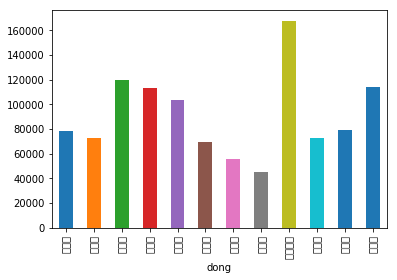

In [209]:
apt[gangnam].groupby('dong')['price'].mean().plot.bar()

#### axis

In [178]:
zlw.axes # 두가지 인덱스를 리스트로 반환, 0-> 행, 1-> 열

[RangeIndex(start=0, stop=10830, step=1),
 Index(['index', 'Date', 'RegionID', 'RegionName', 'State', 'Metro', 'County',
        'SizeRank', 'Zhvi'],
       dtype='object')]

In [181]:
zlw.mean(axis=0) #RangeIndex를 따라가며 평균내주겠다, axis='rows' 로도 가능

index         5414.500000
RegionID     84344.818837
SizeRank      5414.500000
Zhvi        250307.590028
dtype: float64

In [184]:
zlw[['index', 'RegionID']].mean(axis=1).head() # Index(칼럼) 을 따라가며 평균내주겠다, axis='columns'로도 가능

0    28469.5
1    19681.0
2    27135.5
3     9378.0
4    24141.0
dtype: float64

#### check for a substring
str메소드와 정규표현식, 그리고 map을 잘쓰자

In [192]:
zlw.RegionName.str.capitalize().head() # 문자형 함수 쓰기위해 str로 str object 가져옴

0      Abbeville
1      Abbeville
2    Abbottstown
3       Aberdeen
4       Aberdeen
Name: RegionName, dtype: object

In [205]:
zlw.RegionName.str.replace('^Abb','ABB', regex =True).head()

0      ABBeville
1      ABBeville
2    ABBottstown
3       Aberdeen
4       Aberdeen
Name: RegionName, dtype: object

In [197]:
zlw.RegionName.map(lambda x: 'This is '+x).head()

0      This is Abbeville
1      This is Abbeville
2    This is Abbottstown
3       This is Aberdeen
4       This is Aberdeen
Name: RegionName, dtype: object